In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('data/Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


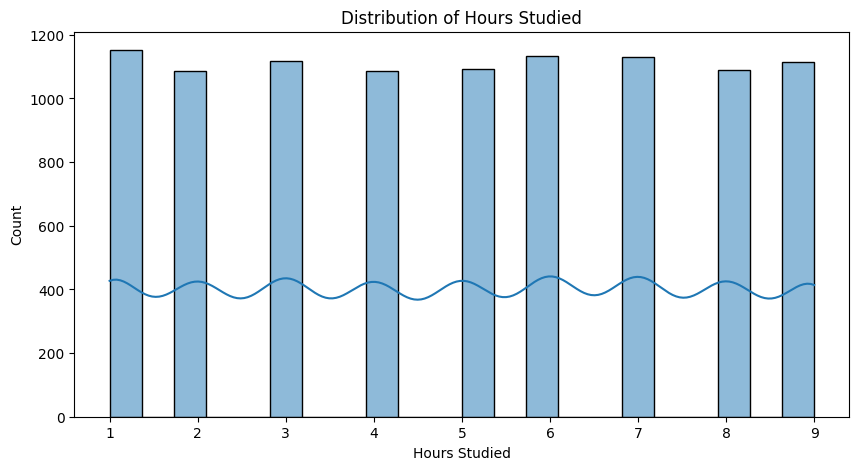

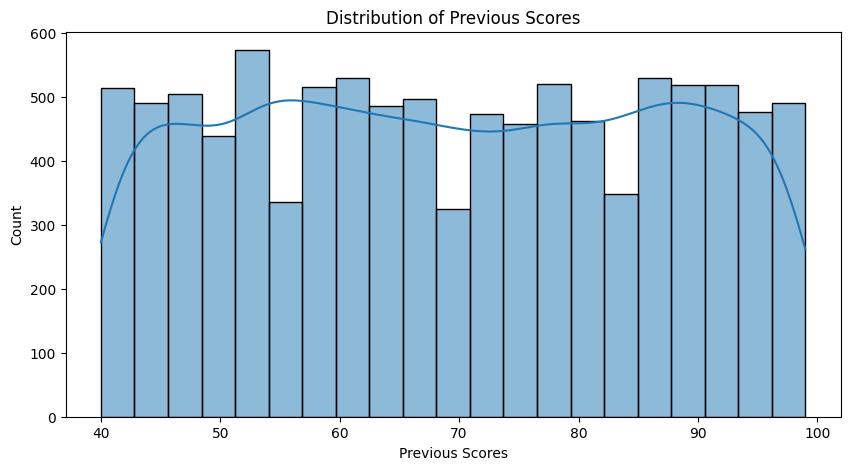

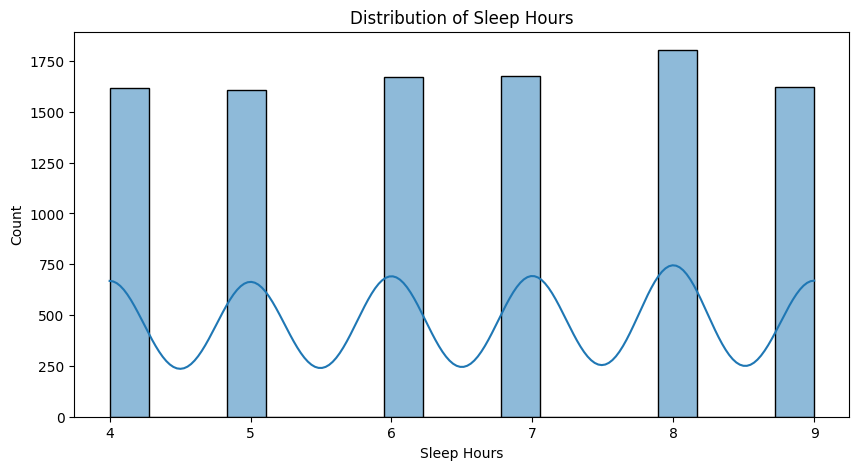

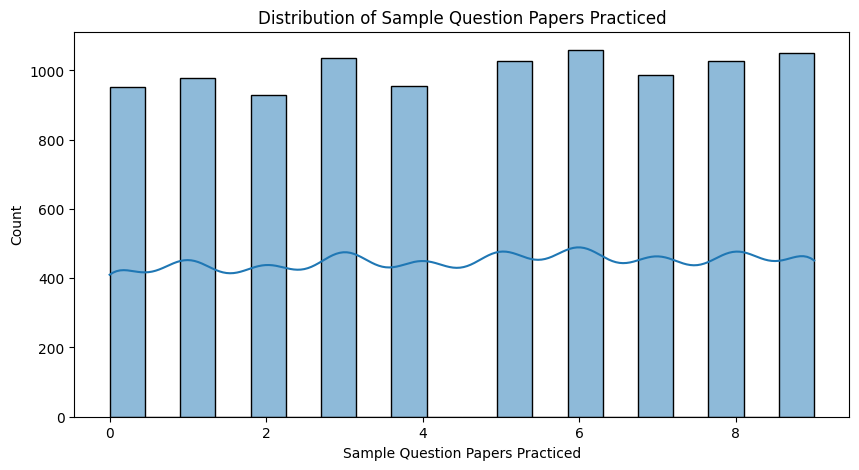

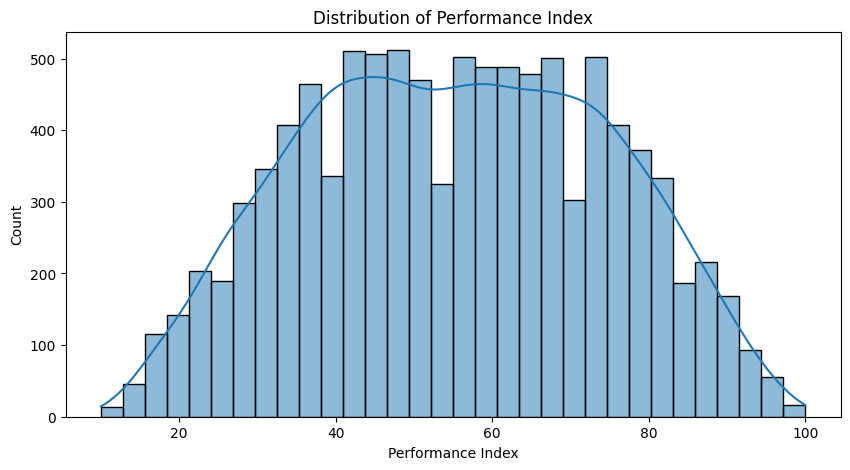

In [5]:

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<Axes: ylabel='count'>

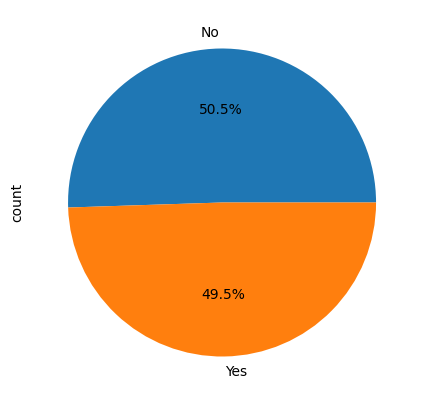

In [6]:
# pie chart for columns Extracurricular Activities
plt.figure(figsize=(10, 5))
df['Extracurricular Activities'].value_counts().plot.pie(autopct='%1.1f%%')

## Any missing daat

In [7]:
# Check for missing values if not we can impute the missing values
print(df.isnull().sum()) 

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


## Plot correlation matrix


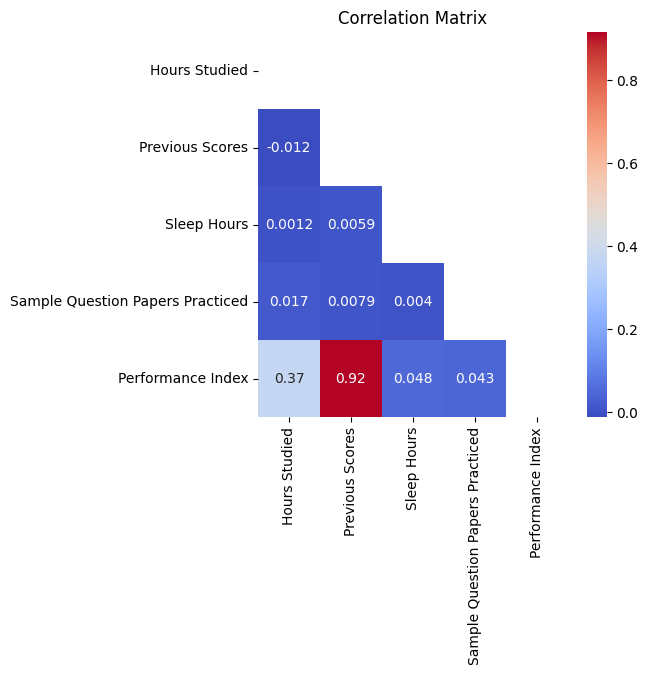

In [8]:
# plot the correlation matrix of the dataset only the upper triangle
plt.figure(figsize=(5, 5))
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool)) 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

- Hours Studied vs. Performance Index: Correlation of 0.37 (moderate positive).
- Previous Scores vs. Performance Index: Correlation of 0.92 (very strong positive).
- Sleep Hours vs. Performance Index: Correlation of 0.048 (very weak positive).
- Sample Question Papers Practiced vs. Performance Index: Correlation of 0.043 (very weak positive).

# convert one categorical column 

In [9]:
# convert the categorical columns to 1 and 0
df = pd.get_dummies(df, drop_first=True)
df['Extracurricular Activities_Yes'] = df['Extracurricular Activities_Yes'].astype(int)
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


# Let's make a model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X = df.drop('Performance Index', axis=1)
y = df['Performance Index']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

k = 5
kf = KFold(n_splits=k, shuffle=True)
# model.fit(X_train, y_train)

mse_scpres = []
r2_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scpres.append(mse)
    r2_scores.append(r2_score(y_test, y_pred))



# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
mse_scpres = np.array(mse_scpres)
r2_scores = np.array(r2_scores)
print(f'Mean of Mean Squared Error: {mse_scpres.mean()}')
print(f'Mean R-squared: {r2_scores.mean()}')





Mean of Mean Squared Error: 4.156044632138335
Mean R-squared: 0.9887347406726091


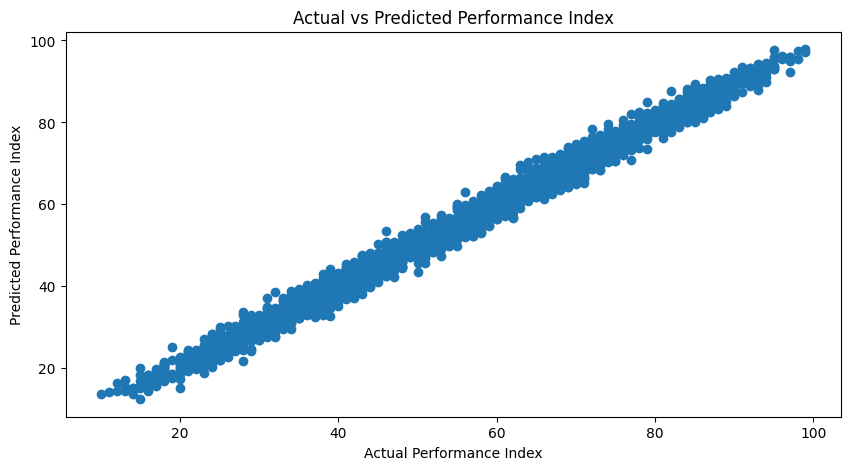

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.show()

In [22]:
# Define the formula for the model
# %pip install statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'Q("Performance Index") ~ Q("Hours Studied") + Q("Previous Scores") + Q("Sleep Hours") + Q("Sample Question Papers Practiced") + Q("Extracurricular Activities_Yes")'


model = ols(formula, data=df).fit()

# ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
anova_table
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q("Performance Index")   R-squared:                       0.989
Model:                                OLS   Adj. R-squared:                  0.989
Method:                     Least Squares   F-statistic:                 1.757e+05
Date:                    Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                            16:18:23   Log-Likelihood:                -21307.
No. Observations:                   10000   AIC:                         4.263e+04
Df Residuals:                        9994   BIC:                         4.267e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Q("Hours Studied")                        2.8530      0.008    362.353      0.000       2.838       2.868
Q("Previous Scores")                      1.0184      0.001    866.450      0.000       1.016       1.021
Q("Sleep Hours")                          0.4806      0.012     39.972      0.000       0.457       0.504
Q("Sample Question Papers Practiced")     0.1938      0.007     27.257      0.000       0.180       0.208
Q("Extracurricular Activities_Yes")       0.6129      0.041     15.029      0.000       0.533       0.693
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# get the equation of the model
model.params


Intercept                               -34.075588
Q("Hours Studied")                        2.852982
Q("Previous Scores")                      1.018434
Q("Sleep Hours")                          0.480560
Q("Sample Question Papers Practiced")     0.193802
Q("Extracurricular Activities_Yes")       0.612898
dtype: float64